In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test.shape
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

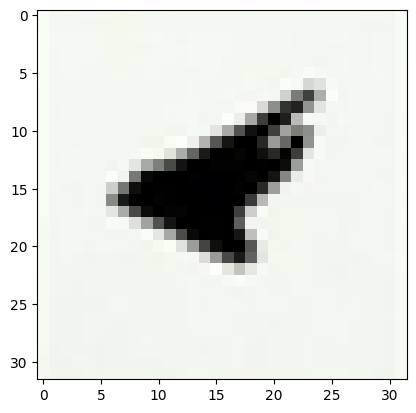

In [ ]:
plt.imshow(X_test[21])

In [ ]:
classes=("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

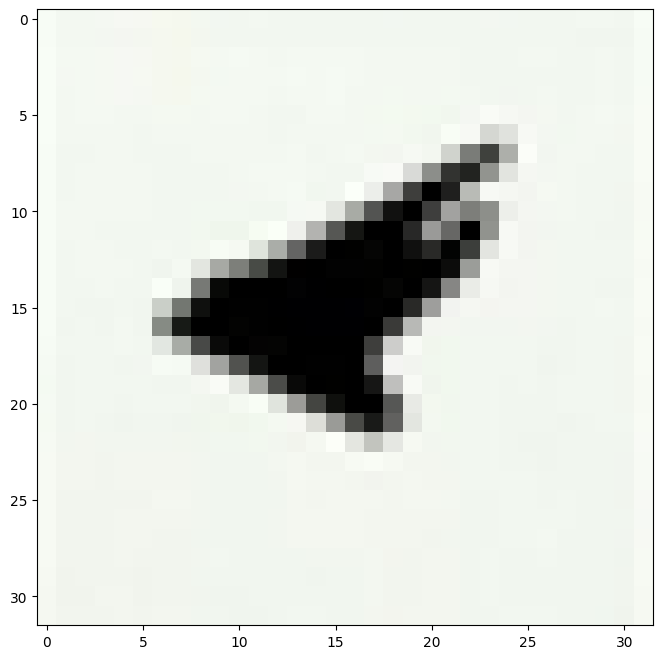

In [ ]:
from operator import index
plt.figure(figsize=[10,8])
plt.imshow(X_test[21])
#plt.xlabel(classes[y_test])

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,5))
  plt.imshow(X[index])
  plt.xlabel(classes[int(y_test[index])])



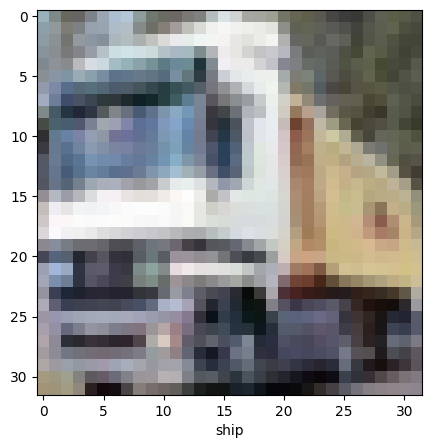

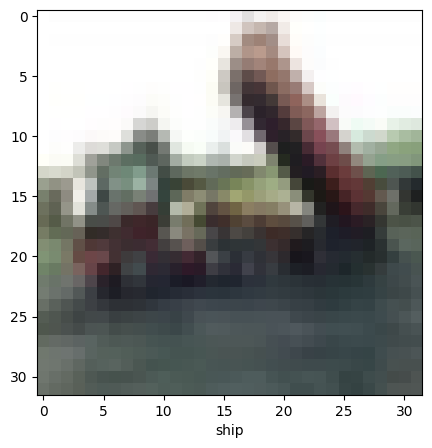

In [ ]:
plot_sample(X_train,y_train,1)
plot_sample(X_train,y_train,2)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train


array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
            )

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 77s 47ms/step - loss: 1.4368 - accuracy: 0.4874
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0981 - accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9650 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.8815 - accuracy: 0.6932
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8191 - accuracy: 0.7144
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7578 - accuracy: 0.7353
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7096 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6698 - accuracy: 0.7657
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6322 - accuracy: 0.7787
Epoch 10/10
1563/1563 [==============================] - 58s 37

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9197 - accuracy: 0.7066


[0.9197297692298889, 0.70660001039505]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      1000
           1       0.83      0.82      0.82      1000
           2       0.60      0.60      0.60      1000
           3       0.51      0.54      0.53      1000
           4       0.68      0.61      0.64      1000
           5       0.64      0.58      0.61      1000
           6       0.79      0.77      0.78      1000
           7       0.74      0.77      0.75      1000
           8       0.79      0.82      0.80      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
y_classes=[np.argmax(element) for element in y_predict]
y_classes[15]

8

In [ ]:
classes

('airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
classes[y_classes[10]]

'airplane'

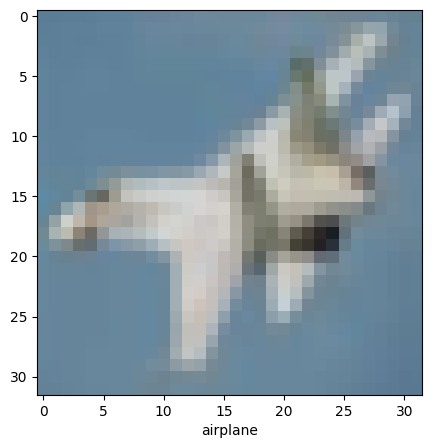

In [ ]:
plot_sample(X_test,y_test,10)

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

In [ ]:
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
ann.fit(X_train,y_train,epochs=9)

Epoch 1/3
1563/1563 [==============================] - 171s 109ms/step - loss: 1.8101 - accuracy: 0.3572
Epoch 2/3
1563/1563 [==============================] - 181s 116ms/step - loss: 1.6215 - accuracy: 0.4302
Epoch 3/3
1563/1563 [==============================] - 182s 116ms/step - loss: 1.5406 - accuracy: 0.4573


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 15s 47ms/step - loss: 1.5548 - accuracy: 0.4538


[1.5548287630081177, 0.4537999927997589]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=ann.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 11s 36ms/step
              precision    recall  f1-score   support

           0       0.54      0.46      0.49      1000
           1       0.44      0.70      0.54      1000
           2       0.43      0.20      0.27      1000
           3       0.30      0.46      0.36      1000
           4       0.52      0.28      0.36      1000
           5       0.40      0.30      0.35      1000
           6       0.54      0.45      0.49      1000
           7       0.57      0.45      0.50      1000
           8       0.47      0.71      0.57      1000
           9       0.47      0.54      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



In [ ]:
y_classes=[np.argmax(element) for element in y_predict]
y_classes[15]

8

In [ ]:
classes

('airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
classes[y_classes[11]]

'truck'

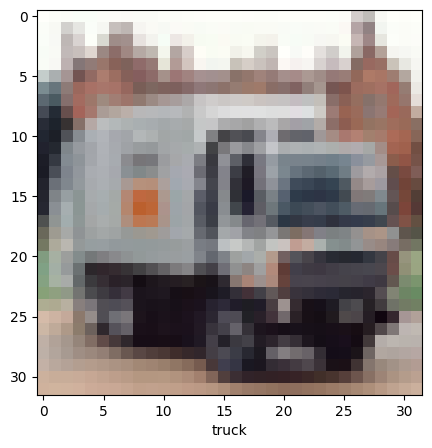

In [ ]:
plot_sample(X_test,y_test,11)